# html

In [10]:
install.packages('rvest')
install.packages('magrittr')


  There is a binary version available but the source version is later:
      binary source needs_compilation
rvest  1.0.0  1.0.2             FALSE



installing the source package 'rvest'




  There is a binary version available but the source version is later:
         binary source needs_compilation
magrittr  2.0.1  2.0.3              TRUE

  Binaries will be installed
package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MEDICI\Anaconda3\Lib\R\library\00LOCK\magrittr\libs\x64\magrittr.dll를 C:\Users\MEDICI\Anaconda3\Lib\R\library\magrittr\libs\x64\magrittr.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'magrittr'"


The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\RtmpmU38KG\downloaded_packages


In [11]:
require(rvest)
library('magrittr')

Loading required package: rvest
Warning message:
"package 'magrittr' was built under R version 3.6.3"

In [7]:
?read_html

In [8]:
html = read_html('10_data/a.html',encoding = "utf-8")
html

{html_document}
<html>
[1] <body>\r\n\t<h1>테스트1</h1>\r\n\t<h1 class="my">테스트2</h1>\r\n\t<h1 id="myh2 ...

ERROR: Error in UseMethod("open"): 클래스 "character"의 객체에 적용된 'open'에 사용할수 있는 메소드가 없습니다


## 태그 선택자(엘리먼트)
https://oscarotero.com/jquery/

In [ ]:
# html_node( html, 'selector') 첫번째 것
# html_nodes( html, 'selector') 첫번째 것

In [ ]:
<html>

<body>
	<h1>테스트1</h1>
	<h1 class="my">테스트2</h1>
	<h1 id="myh2">테스트3</h1>
	<h2>테스트3-1</h2>
	<div id="mydiv">
		<span class="my">테스트4</span>
		<div><span>테스트5</span></div>
	</div>
	<ul class="fruit">
		<li>사과</li>
		<li>딸기</li>
		<li>포도</li>
	</ul>
	<ul class="biz">
		<li>회사1</li>
		<li>회사2</li>
		<li>회사3</li>
	</ul>
	<img src="a.jpg"><br>
	<img src="b.jpg">
</body>
</html>


In [9]:
html_nodes(html, 'h1')

{xml_nodeset (3)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>

In [12]:
html_nodes(html, 'h1,h2') # ,는 or 의미

{xml_nodeset (4)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>
[4] <h2>테스트3-1</h2>

In [13]:
for( h in html_nodes(html, 'h1,h2'))
    {
        cat(html_text(h), fill = T)
}

테스트1
테스트2
테스트3
테스트3-1


### id선택자(#) : 아이디 속성의 값

In [15]:
html_nodes(html, '#myh2')

{xml_nodeset (1)}
[1] <h1 id="myh2">테스트3</h1>

### 클래스선택자(.) : 클래스 속성의 값

In [16]:
html_nodes(html, '.my')

{xml_nodeset (2)}
[1] <h1 class="my">테스트2</h1>
[2] <span class="my">테스트4</span>

In [17]:
html_nodes(html, 'h1.my')

{xml_nodeset (1)}
[1] <h1 class="my">테스트2</h1>

In [18]:
html_nodes(html, 'h1,.my')

{xml_nodeset (4)}
[1] <h1>테스트1</h1>
[2] <h1 class="my">테스트2</h1>
[3] <h1 id="myh2">테스트3</h1>
[4] <span class="my">테스트4</span>

### 속성선택자([])

In [19]:
html_nodes(html, '[src]')

{xml_nodeset (2)}
[1] <img src="a.jpg">
[2] <img src="b.jpg">

In [21]:
for (n in html_nodes(html, '[src]'))
{
    print( html_attr(n,'src') )
}

[1] "a.jpg"
[1] "b.jpg"


In [23]:
html_nodes(html, '[src="a.jpg"]')

{xml_nodeset (1)}
[1] <img src="a.jpg">

In [24]:
html_nodes(html, '[src*="jpg"]')

{xml_nodeset (2)}
[1] <img src="a.jpg">
[2] <img src="b.jpg">

### 자식선택자(>)

In [26]:
html_nodes(html, '#mydiv > span')

{xml_nodeset (1)}
[1] <span class="my">테스트4</span>

In [29]:
html_nodes(html, '.fruit > li')

{xml_nodeset (3)}
[1] <li>사과</li>
[2] <li>딸기</li>
[3] <li>포도</li>

### 후손선택자( 공백)

In [27]:
html_nodes(html, '#mydiv span')

{xml_nodeset (2)}
[1] <span class="my">테스트4</span>
[2] <span>테스트5</span>

### 형제선택자

In [30]:
html_nodes(html, '.fruit + ul') # 오른쪽 형제 첫번째 것

{xml_nodeset (1)}
[1] <ul class="biz">\n<li>회사1</li>\r\n\t\t<li>회사2</li>\r\n\t\t<li>회사3</li>\r\ ...

In [31]:
html_nodes(html, '.fruit ~ ul') # 오른쪽 형제 전부 다 

{xml_nodeset (1)}
[1] <ul class="biz">\n<li>회사1</li>\r\n\t\t<li>회사2</li>\r\n\t\t<li>회사3</li>\r\ ...

### 수도선택자(':정의된 이름')

In [33]:
html_nodes(html,'li:first-child')

{xml_nodeset (2)}
[1] <li>사과</li>
[2] <li>회사1</li>

In [34]:
html_nodes(html,'li:last-child')

{xml_nodeset (2)}
[1] <li>포도</li>
[2] <li>회사3</li>

In [37]:
html_nodes(html, '.fruit > li:nth-child(1)')

{xml_nodeset (1)}
[1] <li>사과</li>

In [38]:
html_nodes(html, '.fruit > li:nth-child(2)')

{xml_nodeset (1)}
[1] <li>딸기</li>

In [36]:
html_nodes(html, '.fruit > li:nth-child(2n)') # 2n은 짝수 번호만 2, 4, 6, ...

{xml_nodeset (1)}
[1] <li>딸기</li>

## 맛집데이터 파싱

In [39]:
url = 'https://www.menupan.com/restaurant/bestrest/bestrest.asp?pt=rt&areacode=ss201'
html = read_html(url, encoding = "euc-kr") # 데이터 많으면 인코딩 cp949
html

{html_document}
<html xmlns="http://www.w3.org/1999/xhtml">
[1] <head>\n<title>맛집TOP1000 - 매일매일 맛있게 메뉴판닷컴</title>\n<meta http-equiv="Cont ...
[2] <body>\r\n<div class="Wrapper">\r\n\t\r\n<table width="980" border="0" al ...

In [42]:
for ( a in html_nodes(html, '.restName > a') ){
    cat(html_text(a) , fill = T)
}

훌리오(JULIO) 강남역점
서초버드나무집
갓덴스시 강남점
잇푸도(IPPUDO) 강남점
참설농탕
아카사카
화기애애
진상 서초본점
도모다찌
평가옥 반포점
잉클링(inkling)
런드리피자(LAUNDRY PIZZA)
우동명가 기리야마 본진
강남교자
빌리엔젤 강남역점
스노우볼 강남역점
아소산겐안
오징어광장 강남점
감성캠핑맥주창고
빈스플(Beansple)
악바리
한도니
투브라더스
아란치오(Arancio)
산쪼메 강남역점


In [51]:
# 순위 
for ( a in html_nodes(html, '.numTop,.rankNum') ){
    cat(html_text(a) , fill = T)
}

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [52]:
# 업종
for ( a in html_nodes(html, '.listType') ){
    cat(html_text(a) , fill = T)
}

기타/세계
한식
일식
일식
한식
일식
한식
일식
일식
한식
카페/주점
패스트푸드
일식
한식
카페/주점
카페/주점
일식
한식
카페/주점
카페/주점
카페/주점
한식
패스트푸드
양식
일식


In [53]:
# 지역
for ( a in html_nodes(html, '.listArea ') ){
    cat(html_text(a) , fill = T)
}

강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
서초구 서초동
서초구 서초동
강남구 역삼동
서초구 서초동
강남구 역삼동
서초구 반포동
송파구 가락동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼동
강남구 역삼동
서초구 서초동
강남구 역삼동
강남구 역삼1동
강남구 역삼1동
강남구 역삼동


In [21]:
순위 = html_text(html_nodes(html,'.numTop,.rankNum'))
업종 = html_text(html_nodes(html,'.listType'))
지역 = html_text(html_nodes(html,'.listArea'))
df = data.frame(순위, 업종,지역)
df

ERROR: Error in html_elements(...): 객체 'html'를 찾을 수 없습니다


# ggplot2

In [57]:
install.packages('ggplot2')

also installing the dependency 'isoband'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MEDICI\AppData\Local\Temp\RtmpcBT5m0\downloaded_packages


installing the source package 'ggplot2'



In [2]:
library(ggplot2)

In [ ]:
# ggplot2 cheatsheet 검색해서 보기

In [59]:
cars

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10
10,18
10,26
10,34
11,17


In [62]:
options(repr.plot.width=6, repr.plot.height=5)

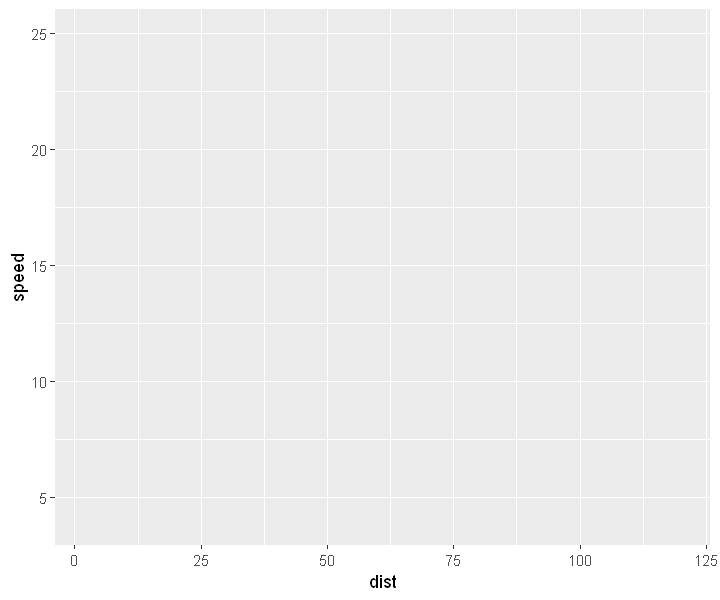

In [64]:
ggplot(cars, aes(x=dist, y=speed)) # 차트대상 영역(윈도우)

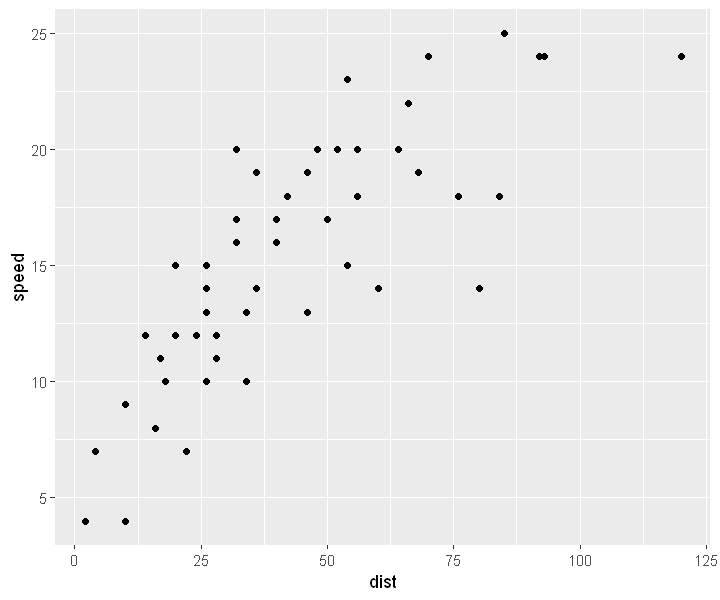

In [63]:
ggplot(cars, aes(x=dist, y=speed)) + geom_point()

In [ ]:
?geom_point

<img src='http://www.sthda.com/sthda/RDoc/images/points-symbols.png'>


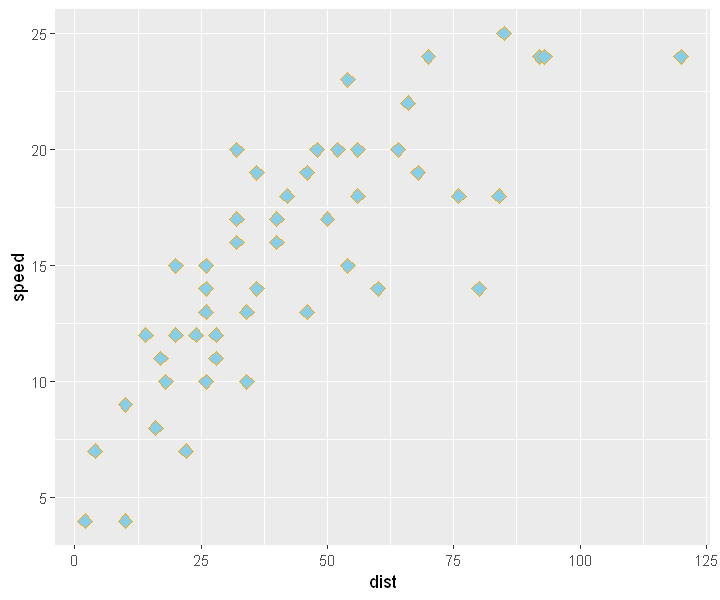

In [75]:
ggplot(cars, aes(x=dist, y=speed)) + geom_point(shape = 23, fill = 'skyblue', col = 'orange', size =3)

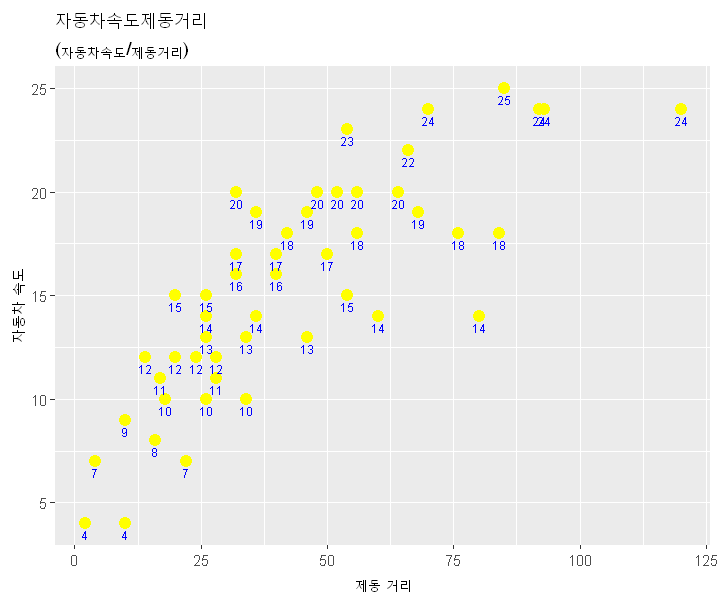

In [84]:
ggplot(cars, aes(x = dist, y = speed)) +
  geom_point(size = 3, color = "yellow") +  
  geom_text( aes(label=speed), color = 'blue', size = 2.5, vjust = 1.6) +
 labs(x='제동 거리', y='자동차 속도',title = '자동차') +
 ggtitle('자동차속도제동거리', subtitle="(자동차속도/제동거리)")

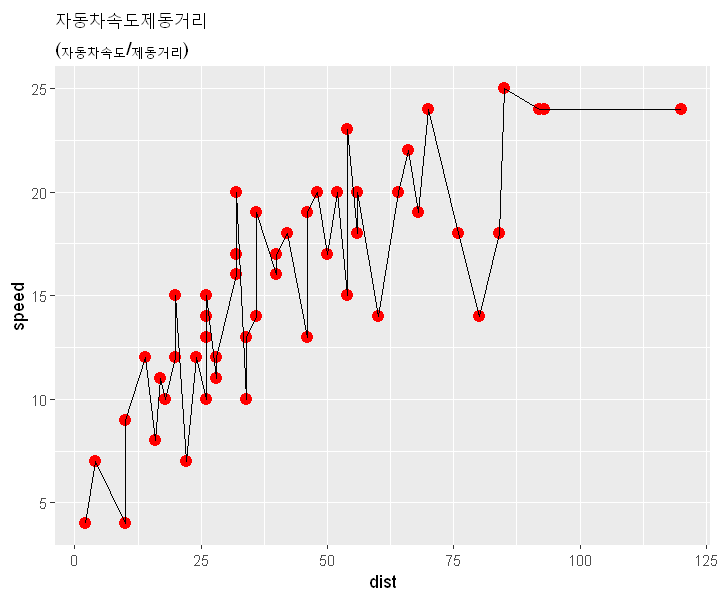

In [86]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
  geom_line() +
 ggtitle('자동차속도제동거리', subtitle="(자동차속도/제동거리)")

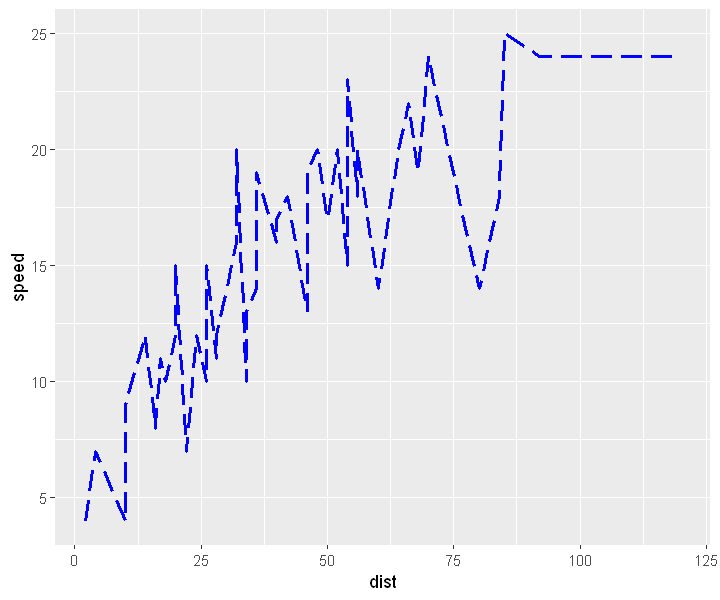

In [95]:
ggplot(cars, aes(x = dist, y = speed)) +
  geom_line(color = 'blue', size =1, linetype = 5) 

`geom_smooth()` using formula 'y ~ x'


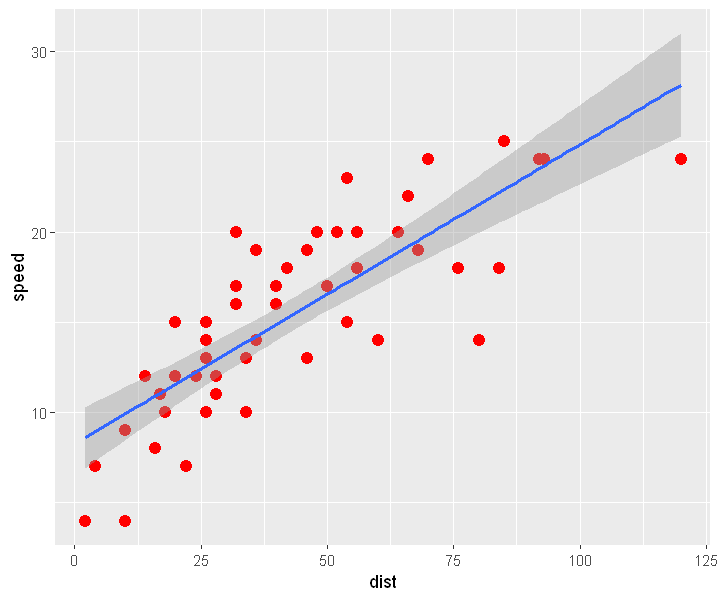

In [87]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
   geom_smooth(method = lm) # 선형회귀(추세선)

`geom_smooth()` using formula 'y ~ x'


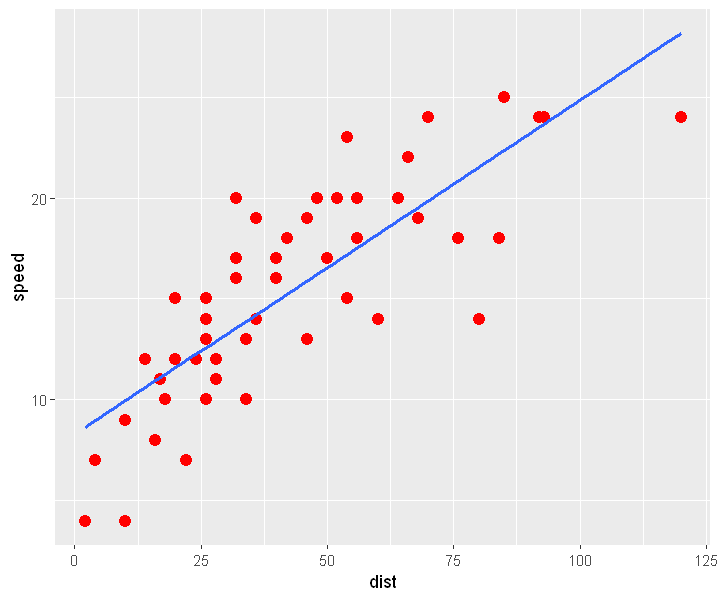

In [89]:
ggplot(cars, aes(x = dist, y = speed)) +
   geom_point(size = 3, color = "red") +
   geom_smooth(method = lm, se = F) # se = F 추세폭 없애기

In [22]:
specie=c( rep("sorgho" , 2) ,
         rep("poacee" , 3) , 
         rep("banana" , 4) , 
         rep("triticum" , 3)  )
condition= rep(c("normal" , "stress" , "Nitrogen") , 4)
value= abs(rnorm(12 , 0 , 15))
df=data.frame(specie,condition,value)
df

specie,condition,value
sorgho,normal,29.3249187
sorgho,stress,0.7869034
poacee,Nitrogen,11.1290861
poacee,normal,17.8306960
poacee,stress,27.4262024
banana,Nitrogen,14.9723359
banana,normal,5.0842174
banana,stress,3.3054079
banana,Nitrogen,42.5309444
triticum,normal,5.8324200


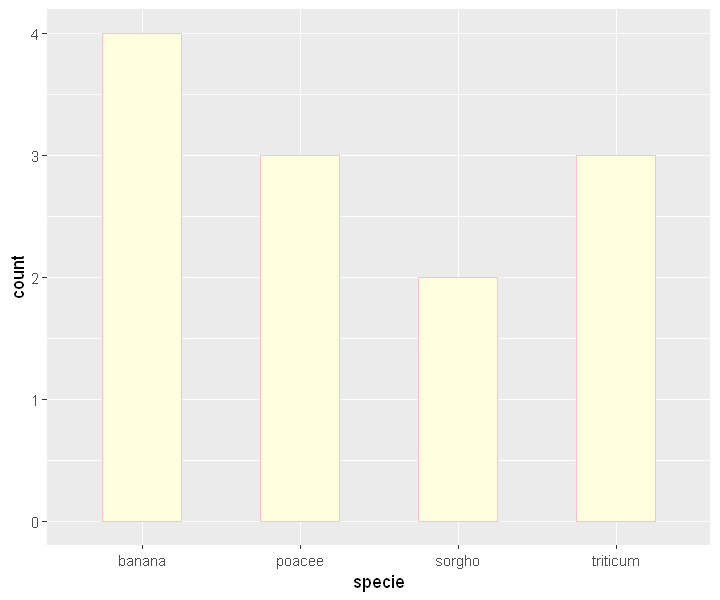

In [102]:
# 컬럼의 개수를 바차트로 나타내기
ggplot(df, aes(x = specie) ) +
geom_bar(width = 0.5, color = 'pink', fill = 'lightyellow') # stat = 'count' 가 디폴트값 

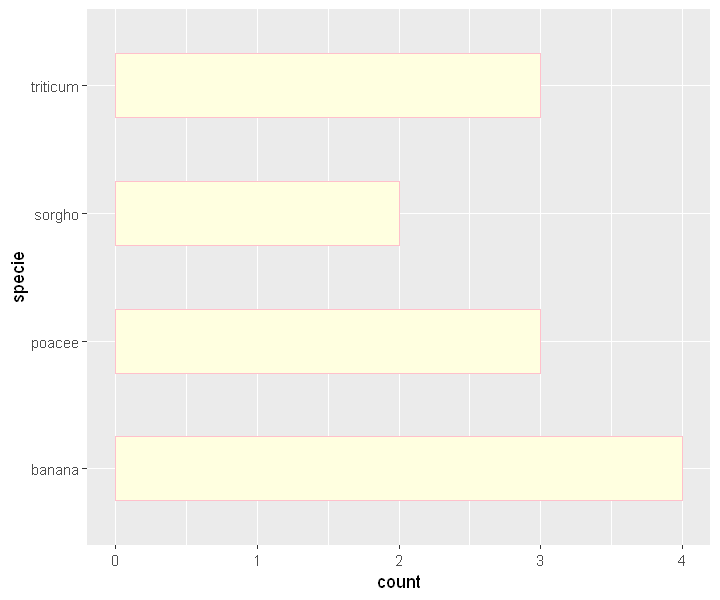

In [103]:
ggplot(df, aes(x = specie) ) +
geom_bar(width = 0.5, color = 'pink', fill = 'lightyellow') +
coord_flip() # 수평으로 보이기

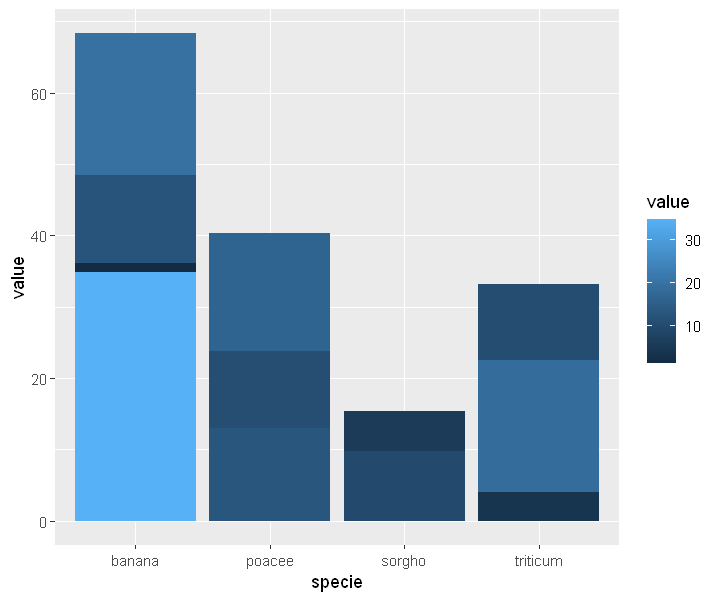

In [113]:
ggplot(df, aes(x = specie, y = value, fill = value) ) +
geom_bar( stat='identity')

In [19]:
library(dplyr)

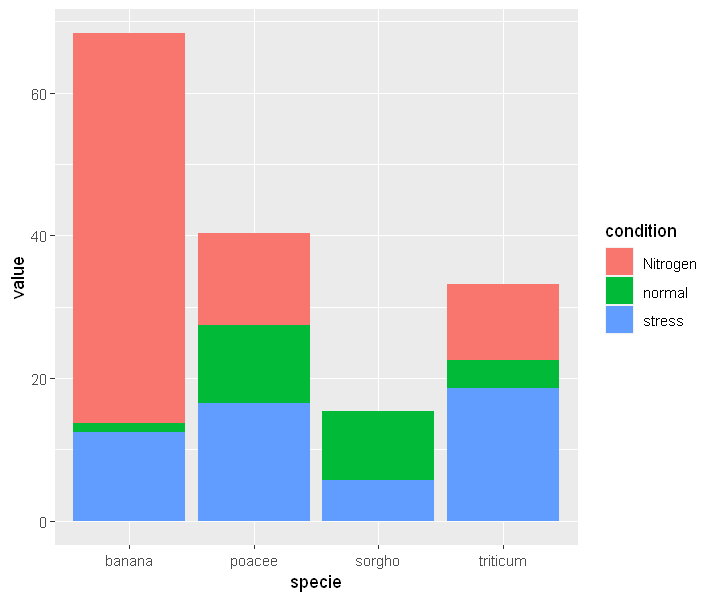

In [116]:
ggplot(df, aes(x = specie, y = value, fill = condition) ) +
geom_bar( stat='identity')

In [117]:
aggregate(value~specie+condition,df, sum)

specie,condition,value
banana,Nitrogen,54.645723
poacee,Nitrogen,12.952209
triticum,Nitrogen,10.657586
banana,normal,1.262364
poacee,normal,10.851971
sorgho,normal,9.723197
triticum,normal,4.001443
banana,stress,12.475587
poacee,stress,16.531622
sorgho,stress,5.710524


In [120]:
arrange(aggregate(value~specie+condition,df, sum),specie)

specie,condition,value
banana,Nitrogen,54.645723
banana,normal,1.262364
banana,stress,12.475587
poacee,Nitrogen,12.952209
poacee,normal,10.851971
poacee,stress,16.531622
sorgho,normal,9.723197
sorgho,stress,5.710524
triticum,Nitrogen,10.657586
triticum,normal,4.001443


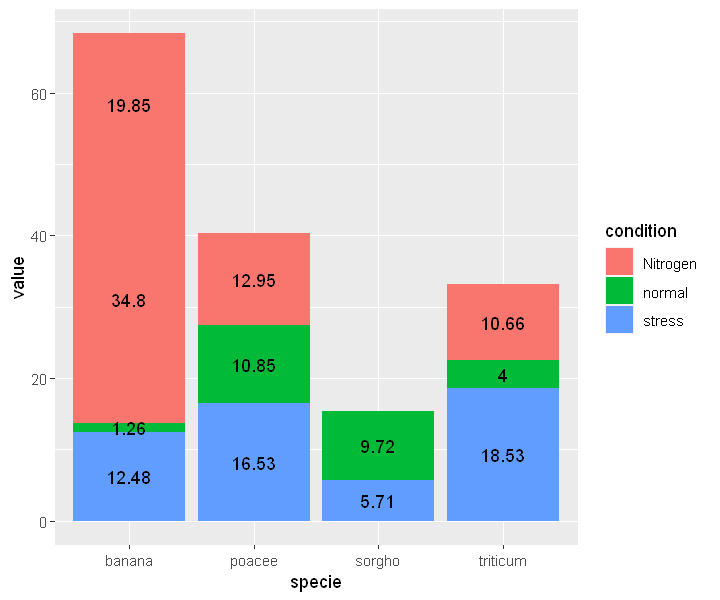

In [123]:
ggplot(df, aes( y=value, x=specie, fill=condition) ) +
geom_bar( stat="identity")+
geom_text( aes(label=round(value,2) ), position = position_stack(vjust = 0.5) )

In [23]:
tt = arrange(aggregate(value~specie+condition,df, sum),specie)
tt

specie,condition,value
banana,Nitrogen,57.5032803
banana,normal,5.0842174
banana,stress,3.3054079
poacee,Nitrogen,11.1290861
poacee,normal,17.8306960
poacee,stress,27.4262024
sorgho,normal,29.3249187
sorgho,stress,0.7869034
triticum,Nitrogen,2.2549423
triticum,normal,5.8324200


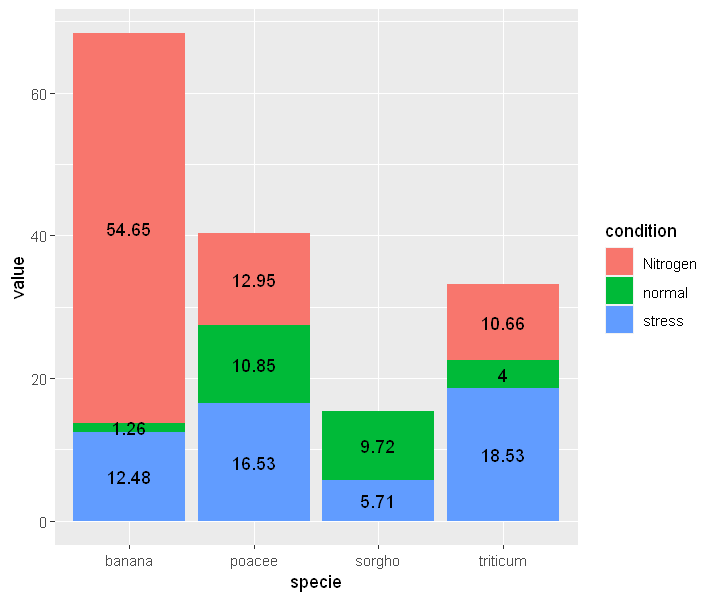

In [125]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar( stat="identity")+
geom_text( aes(label=round(value,2) ), position = position_stack(vjust = 0.5) )

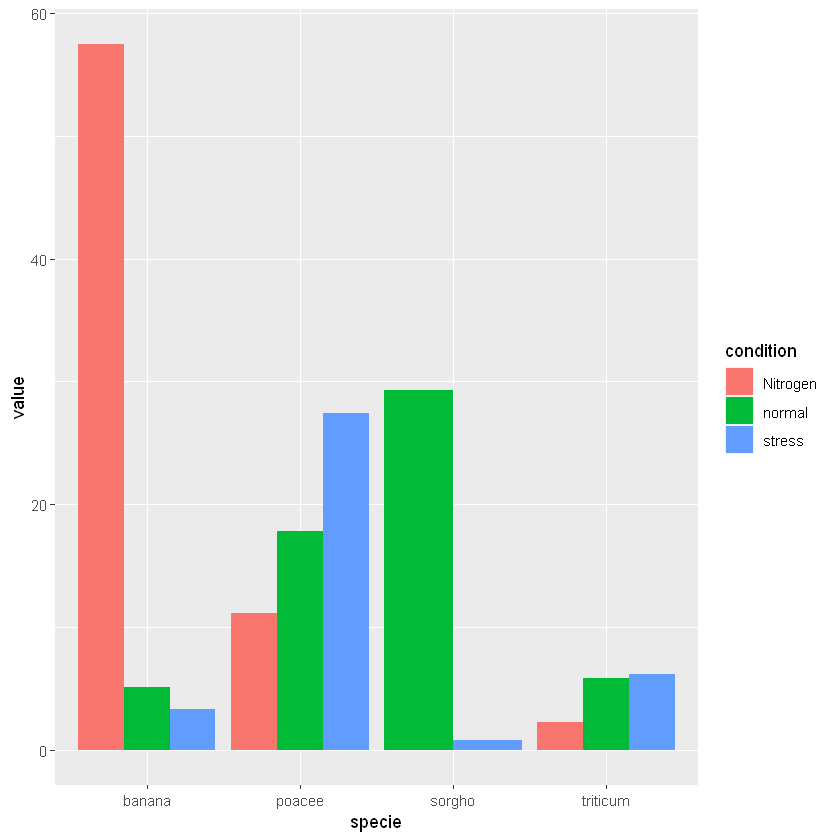

In [24]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='dodge', stat="identity")


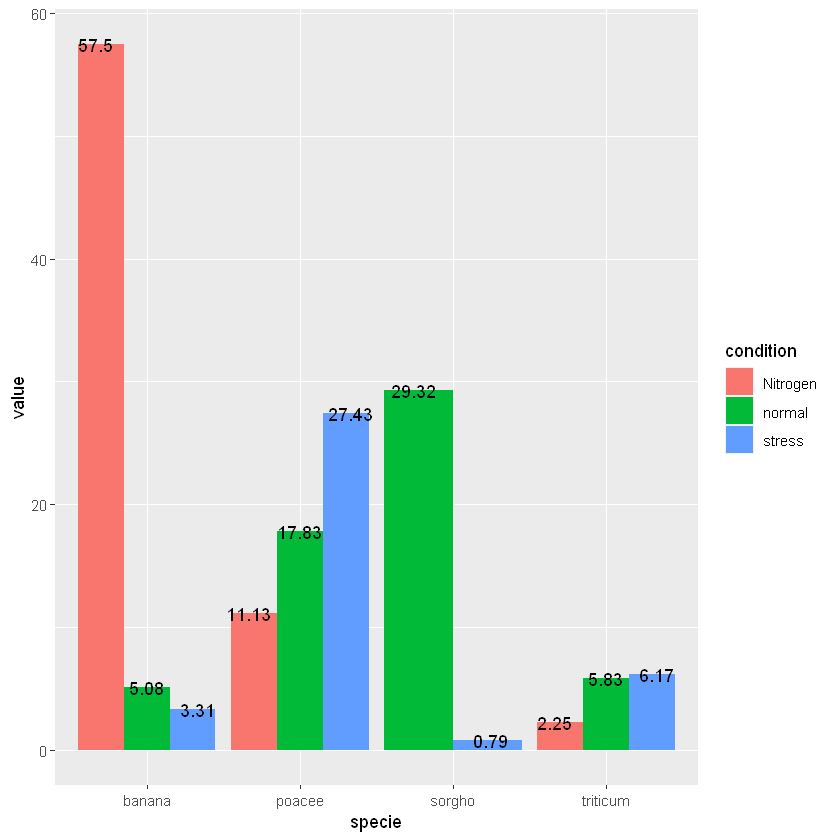

In [26]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='dodge', stat="identity")+
geom_text( aes( label=round(value,2) ),
position = position_dodge( width=1), vjust =0.5 )


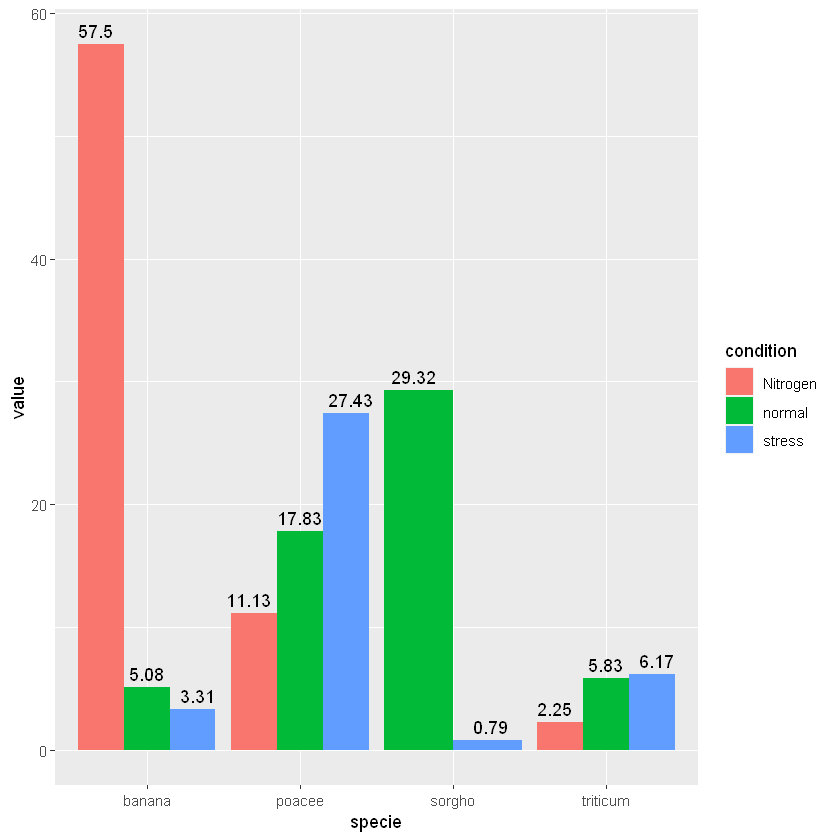

In [28]:
ggplot(tt, aes( y=value, x=specie, fill=condition) ) +
geom_bar(position='dodge', stat="identity")+
geom_text( aes( label=round(value,2) ),
          position = position_dodge( width=1), vjust =-0.5 )


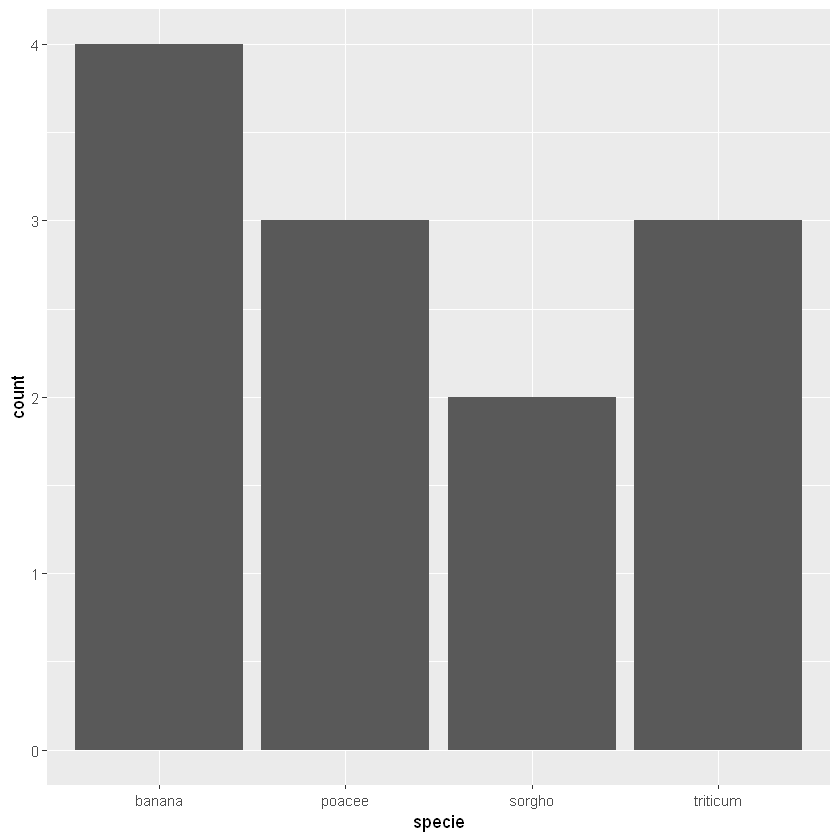

In [29]:
ggplot(df, aes(x = specie))+ geom_bar(stat="count")

In [ ]:
## stat : countm identity, bin

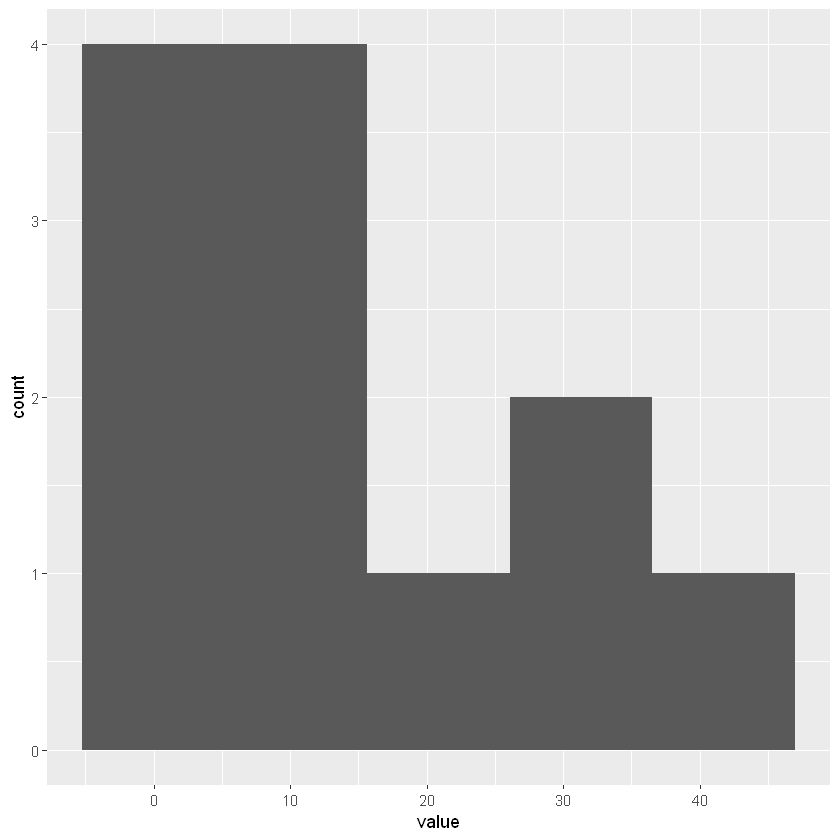

In [30]:
# histogram
ggplot(df,aes(x = value)) + geom_bar(stat = "bin", bins = 5)

In [31]:
t = c(10,20,30,40,50,60,70)
#1계급(9.94,30] :9.94< c<=30
# (30,50]: 30< c<= 50
#(50,70.1]: 50< c<= 70.1
tc = cut(t, 3)
tc
table(tc)

[1] (9.94,30] (9.94,30] (9.94,30] (30,50]   (30,50]   (50,70.1] (50,70.1]
Levels: (9.94,30] (30,50] (50,70.1]

tc
(9.94,30]   (30,50] (50,70.1] 
        3         2         2 

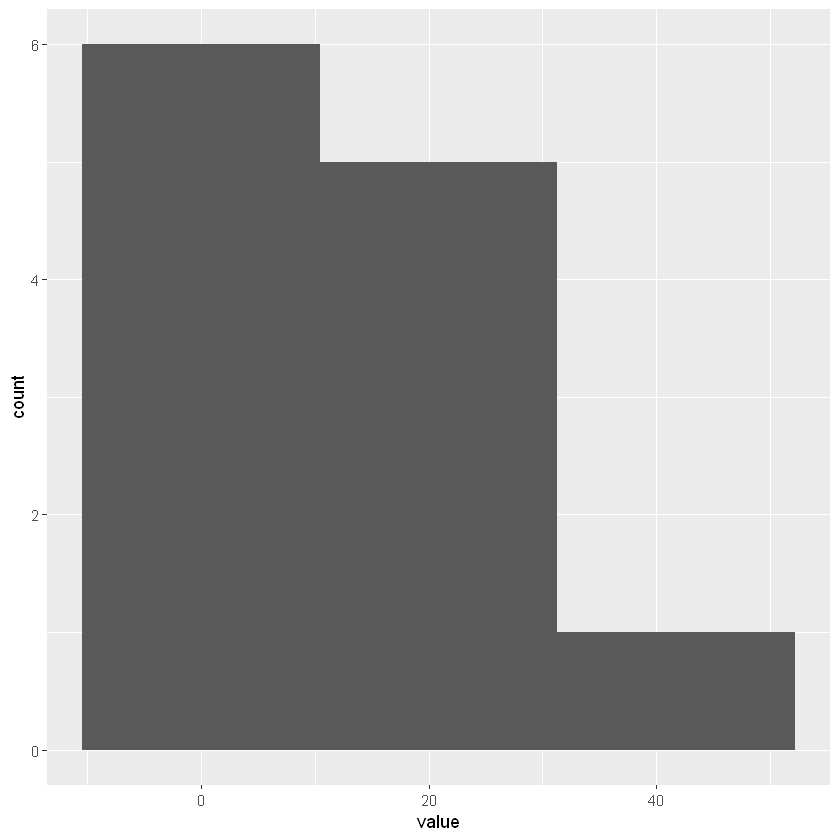

In [32]:
ggplot(df,aes(x = value)) + geom_bar(stat = "bin", bins = 3)